In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
data = pd.read_excel('train.xlsx')
data

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


In [158]:
popular_cat = data.groupby(['Sub-Category'])['Sub-Category'].count().sort_values(ascending=False)
popular_cat

,Sub-Category
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832
Art,785
Accessories,756
Chairs,607
Appliances,459


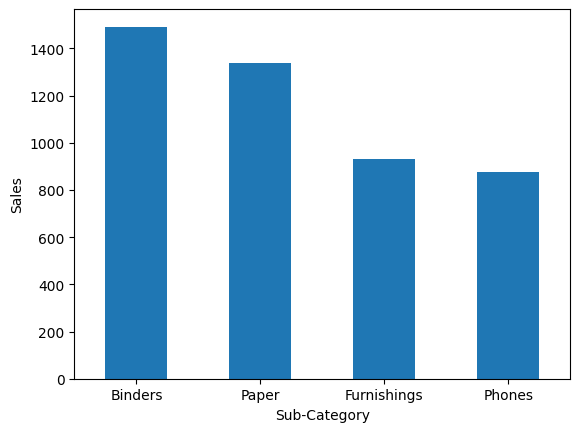

In [169]:
data.groupby(['Sub-Category'])['Sub-Category'].count().sort_values(ascending=False)[:4].plot.bar(rot=0)
plt.ylabel('Sales')
plt.show()

Таким образом, 4 самые популярные категории за все время - Binders, Paper, Furnishings, Phones

In [160]:
data['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [161]:
popular_cat_2 = data[data['Order Date']>'2016-12-30 00:00:00'].groupby(['Sub-Category'])['Sub-Category'].count().sort_values(ascending=False)
popular_cat_2

,Sub-Category
Sub-Category,
Binders,907
Paper,809
Furnishings,558
Phones,510
Storage,491
Art,458
Accessories,450
Chairs,348
Appliances,274


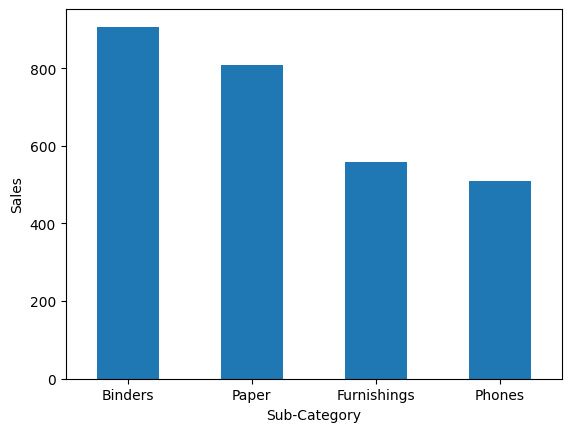

In [168]:
data[data['Order Date']>'2016-12-30 00:00:00'].groupby(['Sub-Category'])['Sub-Category'].count().sort_values(ascending=False)[:4].plot.bar(rot=0)
plt.ylabel('Sales')
plt.show()

Таким образом, 4 самые популярные категории за последние 2 года - Binders, Paper, Furnishings, Phones

In [163]:
popular_cat_2 = data[data['Order Date']>'2017-12-30 00:00:00'].groupby(['Sub-Category'])['Sub-Category'].count().sort_values(ascending=False)
popular_cat_2

,Sub-Category
Sub-Category,
Binders,494
Paper,453
Furnishings,310
Phones,291
Storage,282
Art,281
Accessories,266
Chairs,187
Appliances,161


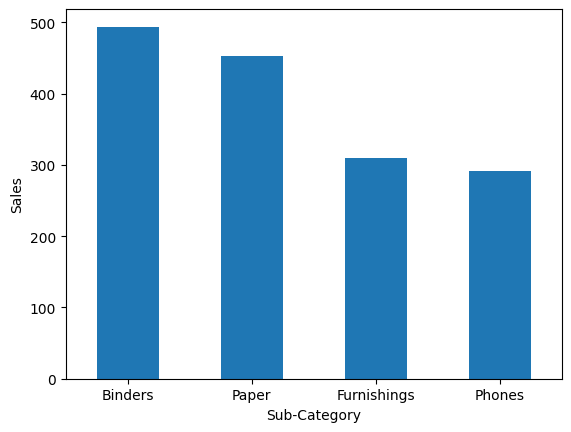

In [167]:
data[data['Order Date']>'2017-12-30 00:00:00'].groupby(['Sub-Category'])['Sub-Category'].count().sort_values(ascending=False)[:4].plot.bar(rot=0)
plt.ylabel('Sales')
plt.show()

За последний год 4 самых популярных категории такие же, как и за последний год и за все время (Binders, Paper, Furnishings, Phones)

В принципе топ 11 категорий являются постоянными и не меняются

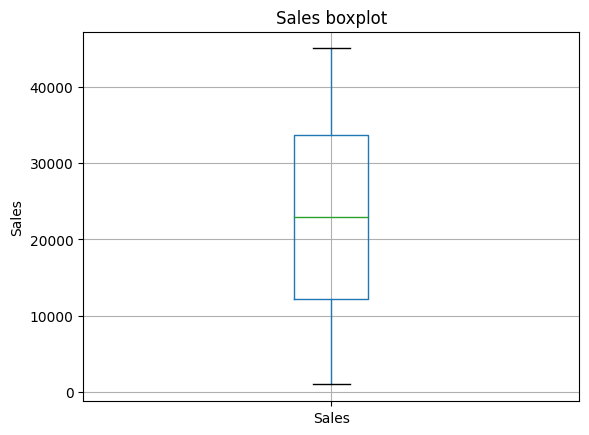

In [170]:
data.boxplot(column=['Sales'])
plt.title('Sales boxplot')
plt.ylabel('Sales')
plt.show()

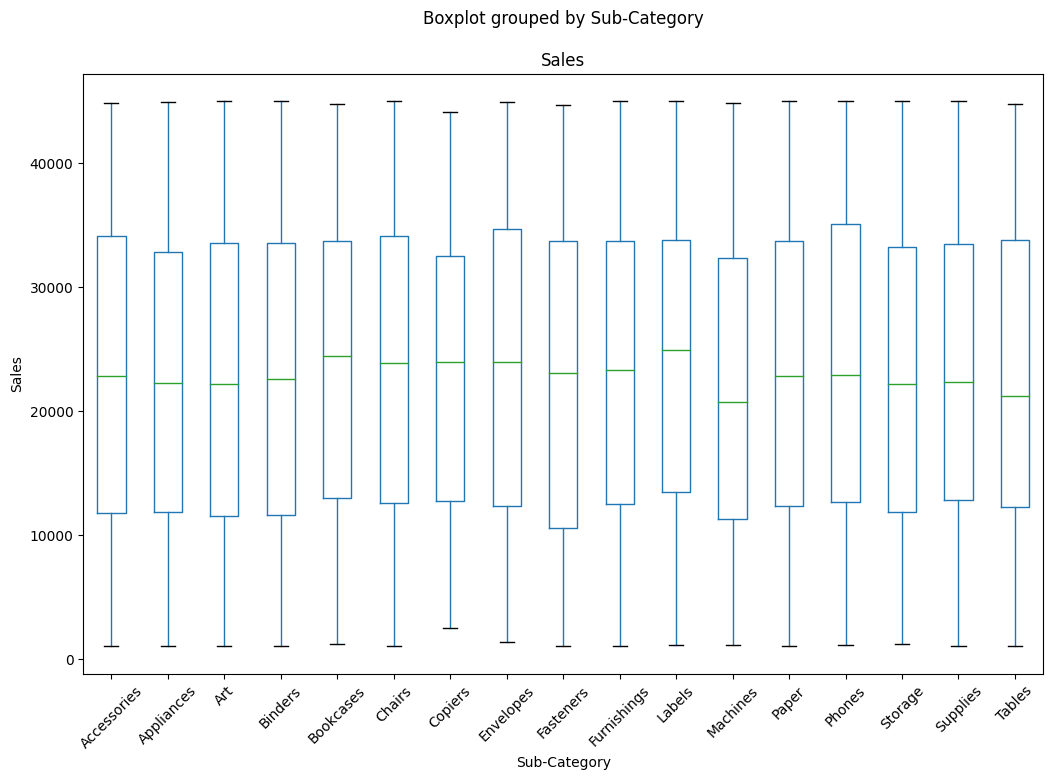

In [174]:
data.boxplot(column='Sales', by='Sub-Category', figsize=(12, 8), grid=False)
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

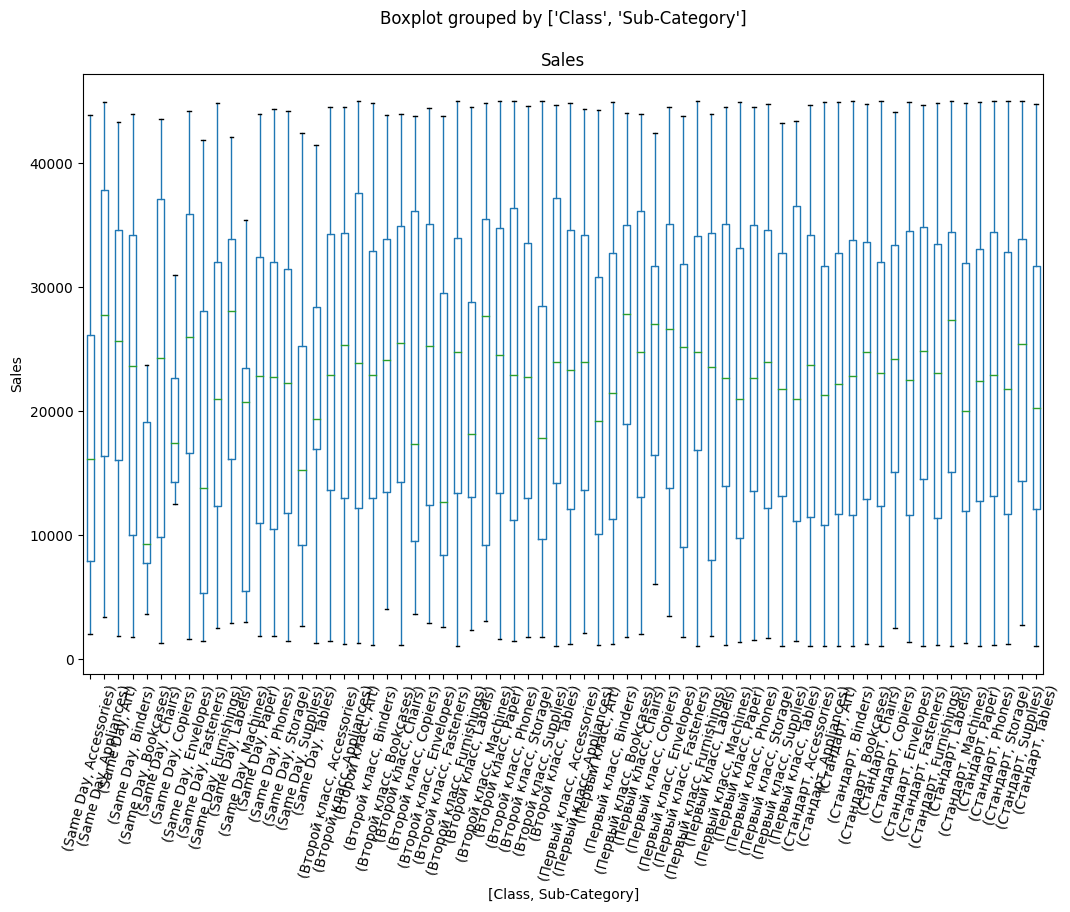

In [175]:
data.boxplot(column='Sales', by=['Class', 'Sub-Category'], figsize=(12, 8), grid=False)
plt.ylabel('Sales')
plt.xticks(rotation=75)
plt.show()

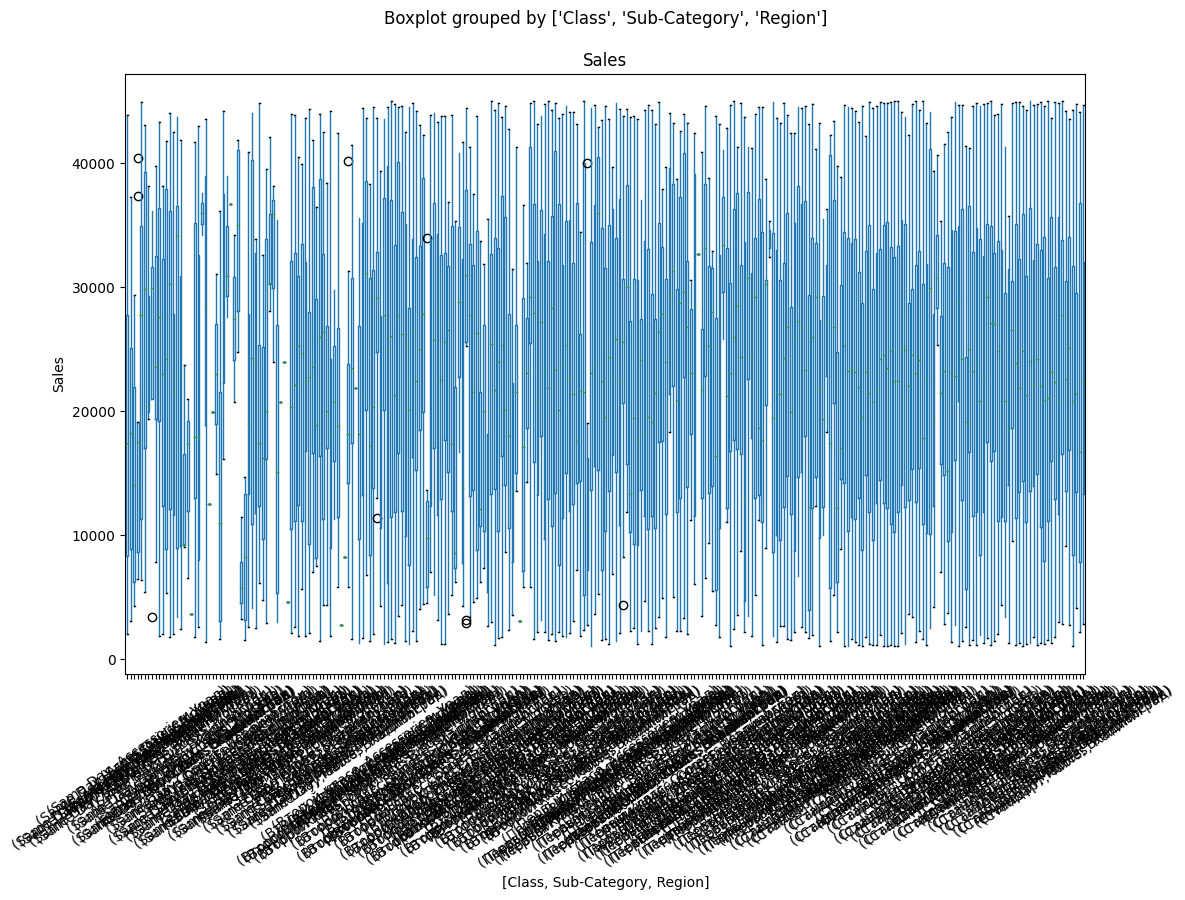

In [179]:
data.boxplot(column='Sales', by=['Class', 'Sub-Category', 'Region'], figsize=(12, 8), grid=False)
plt.ylabel('Sales')
plt.xticks(rotation=35)
plt.show()

In [182]:
grouped = data.groupby(['Class', 'Sub-Category', 'Region'])

def filter(group):

    mean = group['Sales'].mean()
    std = group['Sales'].std()
    min_val = mean - 3 * std
    max_val = mean + 3 * std

    return group[(group['Sales'] >= min_val) & (group['Sales'] <= max_val)]

filtered_data = grouped.apply(filter).reset_index(drop=True)
filtered_data


,ID,Order Date,Class,Region,Sub-Category,Sales
0,4473,2018-09-29,Same Day,Владивосток,Accessories,2006.733
1,8936,2018-08-27,Same Day,Владивосток,Accessories,14030.470
2,8014,2018-05-25,Same Day,Владивосток,Accessories,43838.550
3,8528,2018-03-16,Same Day,Владивосток,Accessories,3784.234
4,4036,2017-12-12,Same Day,Владивосток,Accessories,20762.770
...,...,...,...,...,...,...
9784,916,2015-06-15,Стандарт,Урал,Tables,41235.720
9785,5751,2015-05-30,Стандарт,Урал,Tables,26960.240
9786,7306,2015-03-29,Стандарт,Урал,Tables,23502.320
9787,7841,2015-03-28,Стандарт,Урал,Tables,37604.770


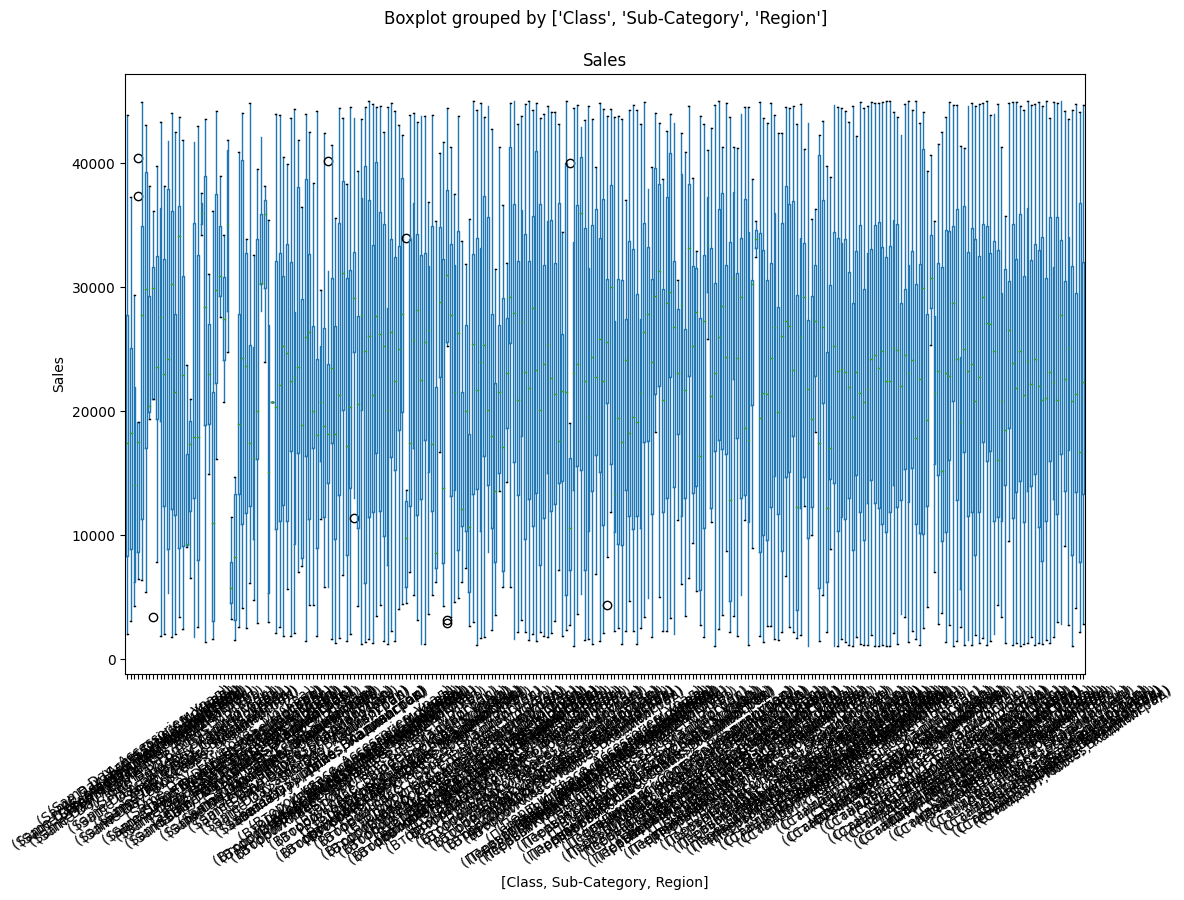

In [185]:
filtered_data.boxplot(column='Sales', by=['Class', 'Sub-Category', 'Region'], figsize=(12, 8), grid=False)
plt.ylabel('Sales')
plt.xticks(rotation=35)
plt.show()

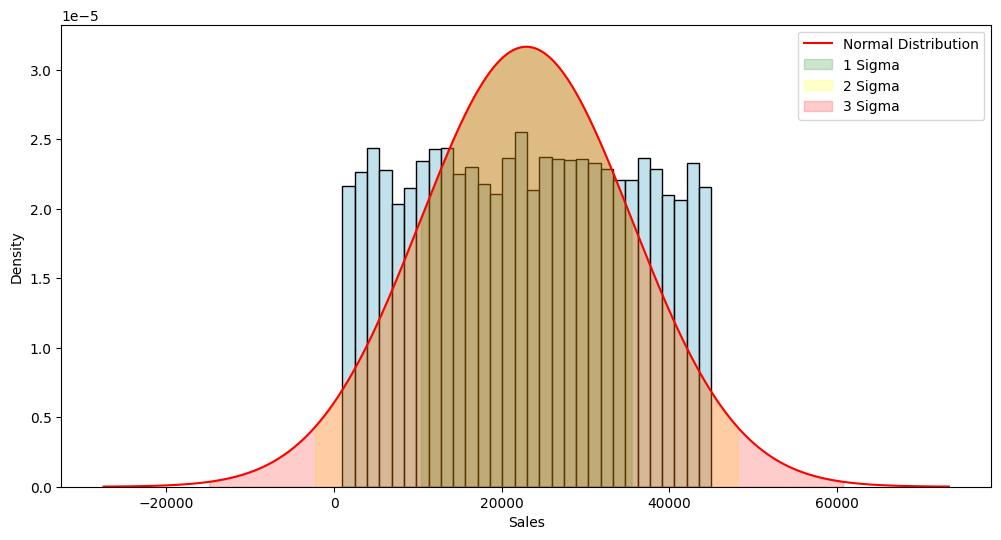

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mean = data['Sales'].mean()
std = data['Sales'].std()

x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)

plt.figure(figsize=(12, 6))
sns.histplot(data['Sales'], bins=30, kde=False, color='lightblue', stat='density')
plt.plot(x, y, 'r-', label='Normal Distribution')

plt.fill_between(x, 0, y, where=(x >= mean - std) & (x <= mean + std), color='green', alpha=0.2, label='1 Sigma')
plt.fill_between(x, 0, y, where=(x >= mean - 2*std) & (x <= mean + 2*std), color='yellow', alpha=0.2, label='2 Sigma')
plt.fill_between(x, 0, y, where=(x >= mean - 3*std) & (x <= mean + 3*std), color='red', alpha=0.2, label='3 Sigma')

plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()

# Показываем график
plt.show()


Номер 4

In [196]:
conditions = [
    filtered_data['Sales'] < 10000,
    (filtered_data['Sales'] > 10000) & (filtered_data['Sales'] <= 35000),
    filtered_data['Sales'] > 35000
]

choices = ['Smal', 'Medium', 'High']

filtered_data['Sale_group'] = np.select(conditions, choices)
filtered_data

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,4473,2018-09-29,Same Day,Владивосток,Accessories,2006.733,Smal
1,8936,2018-08-27,Same Day,Владивосток,Accessories,14030.470,Medium
2,8014,2018-05-25,Same Day,Владивосток,Accessories,43838.550,High
3,8528,2018-03-16,Same Day,Владивосток,Accessories,3784.234,Smal
4,4036,2017-12-12,Same Day,Владивосток,Accessories,20762.770,Medium
...,...,...,...,...,...,...,...
9784,916,2015-06-15,Стандарт,Урал,Tables,41235.720,High
9785,5751,2015-05-30,Стандарт,Урал,Tables,26960.240,Medium
9786,7306,2015-03-29,Стандарт,Урал,Tables,23502.320,Medium
9787,7841,2015-03-28,Стандарт,Урал,Tables,37604.770,High


In [197]:
filtered_data.groupby(['Region','Sale_group'])['Sales'].describe()

count          mean          std        min  \
Region      Sale_group                                                 
Владивосток High         643.0  39894.201866  2985.769056  35009.940   
            Medium      1565.0  22480.232256  7277.445876  10005.910   
            Smal         575.0   5397.518983  2579.904675   1003.082   
Калиниград  High         676.0  40029.158772  2871.181466  35011.360   
            Medium      1850.0  22405.871303  7132.182642  10000.890   
            Smal         613.0   5546.279874  2563.155780   1021.104   
Москва      High         372.0  39755.776989  2778.792889  35002.050   
            Medium       898.0  22559.331414  7100.499155  10001.360   
            Smal         324.0   5531.399151  2551.580129   1012.536   
Урал        High         488.0  39962.054467  2927.704156  35022.320   
            Medium      1337.0  22343.062640  7304.249041  10018.860   
            Smal         448.0   5362.363587  2620.561045   1002.794   

                                25%        50%          75%        max  
Region      Sale_group                                                  
Владивосток High        37246.04000  39933.690  42608.51500  44990.440  
            Medium      15953.31000  22480.950  28891.48000  34981.240  
            Smal         3201.47300   5239.791   7729.79650   9990.368  
Калиниград  High        37436.61250  40145.860  42511.77250  44986.260  
            Medium      16115.60000  22325.975  28506.39250  34998.760  
            Smal         3318.98400   5511.146   7732.74700   9983.794  
Москва      High        37360.88750  39656.725  42067.08500  44995.410  
            Medium      16526.89750  22717.220  28645.62500  34852.630  
            Smal         3356.79875   5552.463   7708.54025   9974.750  
Урал        High        37493.96000  39776.620  42644.72750  44942.310  
            Medium      16032.71000  22264.120  28691.11000  34954.370  
            Smal         3147.93850   5248.540   7473.78550   9990.041

In [198]:
filtered_data.groupby(['Region'])['Sales'].sum()

,Sales
Region,
Владивосток,6.393711e+07
Калиниград,7.191044e+07
Москва,3.683960e+07
Урал,5.177650e+07


In [199]:
filtered_data.groupby(['Region','Sale_group'])['Sales'].sum()

Region       Sale_group
Владивосток  High          2.565197e+07
             Medium        3.518156e+07
             Smal          3.103573e+06
Калиниград   High          2.705971e+07
             Medium        4.145086e+07
             Smal          3.399870e+06
Москва       High          1.478915e+07
             Medium        2.025828e+07
             Smal          1.792173e+06
Урал         High          1.950148e+07
             Medium        2.987267e+07
             Smal          2.402339e+06
Name: Sales, dtype: float64

Москва, на удивление, самый невыгодный город по продажам. Во-первых, общее количество продаж (маленьких, средних и высоких) минимальное среди четырех регионов. Среднее значение по всем продажам также минимально.

На втором месте по отстающим идет Урал, потом Владивосток и лидером оказывается Калининград по всем своим продажам.

В каждом регионе средние продажи приносили наибольшее количество прибыли, а самые высокие продажи наименьшее количество прибыли.

Если рассматривать чисто группы, по которым было сделано разделение, то самой прибыльной оказался Калининград со средними продажами.
